In [1216]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [1217]:
AWS_ACCESS_KEY_ID = "dlytica"
AWS_SECRET_ACCESS_KEY = "Dlytica@123#"
S3_ENDPOINT = "http://dlytica-academy-server-l2a-master.eastus.cloudapp.azure.com:31000"
S3_BUCKET = "dilip"

In [1218]:
import boto3
from s3fs import S3FileSystem

s3 = S3FileSystem(
    key=AWS_ACCESS_KEY_ID,
    secret=AWS_SECRET_ACCESS_KEY,
    client_kwargs={"endpoint_url": S3_ENDPOINT}
)
csv_files = s3.glob(f"s3://{S3_BUCKET}/Customer/*.csv")

df_list = []
for file in csv_files:
    with s3.open(file, mode='rb') as f:
        df = pd.read_csv(f)
        df_list.append(df)

df1= pd.concat(df_list, ignore_index=True)
df1.head()

,_airbyte_ab_id,_airbyte_emitted_at,Age,Customer ID,Date,Gender,Price per Unit,Product Category,Quantity,Total Amount,Transaction ID,_ab_source_file_last_modified,_ab_source_file_url
0,32dab956-3a50-4b4e-9993-124a50f3b5c2,1720562367789,34.0,CUST001,2023-11-24 00:00:00.000,Male,50.0,Beauty,3.0,150.0,1.0,2024-07-07T05:02:41.631000Z,dataset.csv
1,1539dd0e-2986-4295-93af-5f1fa80f89f4,1720562367790,26.0,CUST002,2023-02-27 00:00:00.000,Female,500.0,Clothing,2.0,1000.0,2.0,2024-07-07T05:02:41.631000Z,dataset.csv
2,aba497d6-91e4-4a40-9f29-f7f1f89ffc62,1720562367790,50.0,CUST003,2023-01-13 00:00:00.000,Male,30.0,Electronics,1.0,30.0,3.0,2024-07-07T05:02:41.631000Z,dataset.csv
3,e474cbdf-81fd-4e1b-96e8-1f3fe00cb3fb,1720562367790,37.0,CUST004,2023-05-21 00:00:00.000,Male,500.0,Clothing,1.0,500.0,4.0,2024-07-07T05:02:41.631000Z,dataset.csv
4,20eeed98-7ce1-4053-aaca-f66159f5ca7f,1720562367790,30.0,CUST005,2023-05-06 00:00:00.000,Male,50.0,Beauty,2.0,100.0,5.0,2024-07-07T05:02:41.631000Z,dataset.csv


1)a. Get an overview of the dataset including data types, missing values, and summary statistics (mean, median, min, max, etc.) for numeric columns.

In [1219]:
df1.shape

(5073, 13)

In [1220]:
df1 = df1[['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']]
df1.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1.0,2023-11-24 00:00:00.000,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2.0,2023-02-27 00:00:00.000,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0
2,3.0,2023-01-13 00:00:00.000,CUST003,Male,50.0,Electronics,1.0,30.0,30.0
3,4.0,2023-05-21 00:00:00.000,CUST004,Male,37.0,Clothing,1.0,500.0,500.0
4,5.0,2023-05-06 00:00:00.000,CUST005,Male,30.0,Beauty,2.0,50.0,100.0


In [1221]:
df1.shape

(5073, 9)

In [1222]:
df1.dtypes

Transaction ID      float64
Date                 object
Customer ID          object
Gender               object
Age                 float64
Product Category     object
Quantity            float64
Price per Unit      float64
Total Amount        float64
dtype: object

In [1223]:
df1.isnull().sum()

Transaction ID       8
Date                 8
Customer ID         28
Gender               8
Age                  8
Product Category    18
Quantity            48
Price per Unit      73
Total Amount        48
dtype: int64

In [1224]:
df1.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,5065.000000,5065.000000,5025.000000,5000.000000,5025.000000
mean,507.013820,41.373149,2.519403,179.330000,457.910448
std,292.480272,13.694180,1.131691,189.862742,563.368192
min,1.000000,18.000000,1.000000,25.000000,25.000000
25%,254.000000,29.000000,1.000000,30.000000,60.000000
50%,507.000000,42.000000,3.000000,50.000000,120.000000
75%,760.000000,53.000000,4.000000,300.000000,900.000000
max,1014.000000,64.000000,4.000000,500.000000,2000.000000


2)a. Drop the row whose column = Customer_ID is Missing.

In [1225]:
df1.dropna(subset=['Customer ID'], inplace=True)

In [1226]:
df1.isnull().sum()

Transaction ID       0
Date                 0
Customer ID          0
Gender               0
Age                  0
Product Category    10
Quantity            40
Price per Unit      65
Total Amount        40
dtype: int64

b. Add mode value to the row whose Product Category is missing.

In [1227]:
mode = df['Product Category'].mode()[0]
mode

'Clothing'

In [1228]:
df1["Product Category"] = df1["Product Category"].fillna(mode)

In [1229]:
df1.isnull().sum()

Transaction ID       0
Date                 0
Customer ID          0
Gender               0
Age                  0
Product Category     0
Quantity            40
Price per Unit      65
Total Amount        40
dtype: int64

c. Add values using medium on the row whose Column Quantity and price is missing.

In [1230]:
df1["Price per Unit"] = df1["Price per Unit"].fillna(df1["Price per Unit"].median())
df1["Quantity"] = df1["Quantity"].fillna(df1["Quantity"].median())

In [1231]:
df1.isnull().sum()

Transaction ID       0
Date                 0
Customer ID          0
Gender               0
Age                  0
Product Category     0
Quantity             0
Price per Unit       0
Total Amount        40
dtype: int64

d. Add values using multiplication of column quantity and price per product if total amount column is empty.

In [1232]:
df1["Total Amount"] = df1["Total Amount"].fillna(df1["Quantity"] * df1["Price per Unit"])
df1.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

e. Remove time from date column.

In [1233]:
print(df1["Date"].dtype)

object


In [1234]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [1235]:
print(df1["Date"].dtype)

datetime64[ns]


In [1236]:
df1['Date'] = df1['Date'].dt.date
print(df1)

      Transaction ID        Date Customer ID  Gender   Age Product Category  \
0                1.0  2023-11-24     CUST001    Male  34.0           Beauty   
1                2.0  2023-02-27     CUST002  Female  26.0         Clothing   
2                3.0  2023-01-13     CUST003    Male  50.0      Electronics   
3                4.0  2023-05-21     CUST004    Male  37.0         Clothing   
4                5.0  2023-05-06     CUST005    Male  30.0           Beauty   
...              ...         ...         ...     ...   ...              ...   
5066          1010.0  2023-10-15     CUST121  Female  28.0      Electronics   
5067          1011.0  2023-10-03     CUST122    Male  64.0      Electronics   
5068          1012.0  2023-05-15     CUST123  Female  40.0      Electronics   
5069          1013.0  2023-10-27     CUST124    Male  33.0         Clothing   
5070          1014.0  2023-08-08     CUST125    Male  48.0         Clothing   

      Quantity  Price per Unit  Total Amount  
0   

In [1237]:
df1.head(2)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1.0,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150.0
1,2.0,2023-02-27,CUST002,Female,26.0,Clothing,2.0,500.0,1000.0


In [1238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5045 entries, 0 to 5070
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    5045 non-null   float64
 1   Date              5045 non-null   object 
 2   Customer ID       5045 non-null   object 
 3   Gender            5045 non-null   object 
 4   Age               5045 non-null   float64
 5   Product Category  5045 non-null   object 
 6   Quantity          5045 non-null   float64
 7   Price per Unit    5045 non-null   float64
 8   Total Amount      5045 non-null   float64
dtypes: float64(5), object(4)
memory usage: 394.1+ KB


In [1239]:
df1.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

3. Analyze customer age, gender distribution, and visualize in stacked bar chart.

<Axes: xlabel='Gender', ylabel='count'>

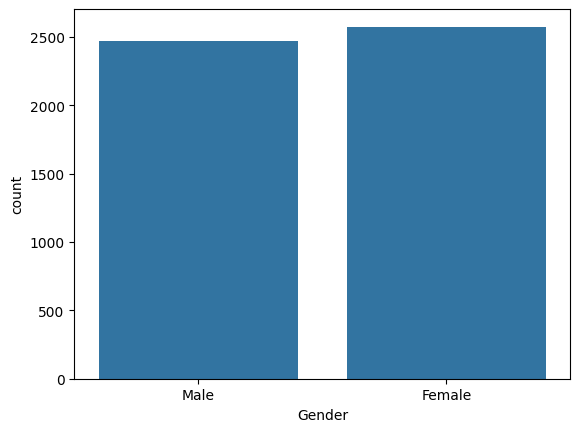

In [1240]:
sns.countplot(x = 'Gender', data = df1)

In [1241]:
bins = [15, 25, 35, 45, 55, 65]
labels = ['15-24', '25-34', '35-44', '45-54', '55-64']
df1['Age Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=False)
df1[["Age","Age Group"]].head()

,Age,Age Group
0,34.0,25-34
1,26.0,25-34
2,50.0,45-54
3,37.0,35-44
4,30.0,25-34


<Axes: xlabel='Age Group', ylabel='count'>

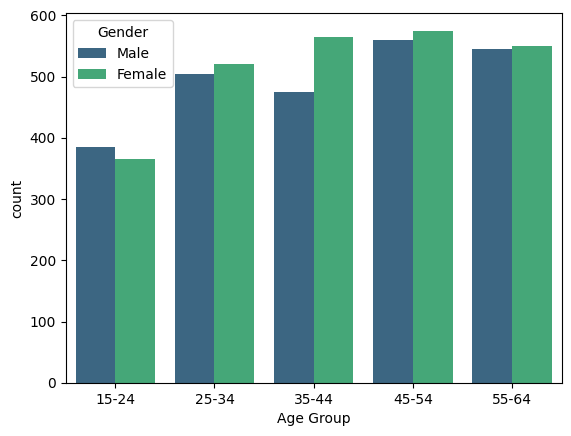

In [1242]:
sns.countplot(data = df1, x = 'Age Group', hue = 'Gender', palette='viridis')

4. Explore popular product categories and average spending.

In [1243]:
df2 = df1.groupby(["Product Category"],as_index = False)['Total Amount'].sum().sort_values(by= "Total Amount",ascending = False)
df2

,Product Category,Total Amount
2,Electronics,800675.0
1,Clothing,795850.0
0,Beauty,718175.0


<Axes: xlabel='Product Category', ylabel='Total Amount'>

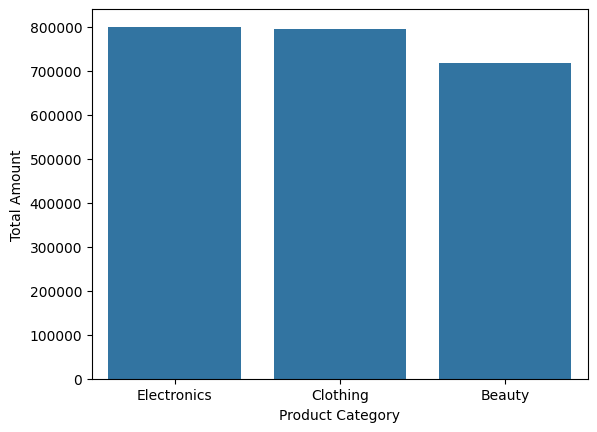

In [1244]:
sns.barplot( x = "Product Category", y = "Total Amount", data = df2)

5. Analyze product categories and their popularity.

In [1245]:
df3 = df1.groupby(["Product Category"],as_index = False)['Quantity'].sum().sort_values(by= "Quantity",ascending = False)
df3

,Product Category,Quantity
1,Clothing,4530.0
2,Electronics,4325.0
0,Beauty,3875.0


<Axes: xlabel='Product Category', ylabel='Quantity'>

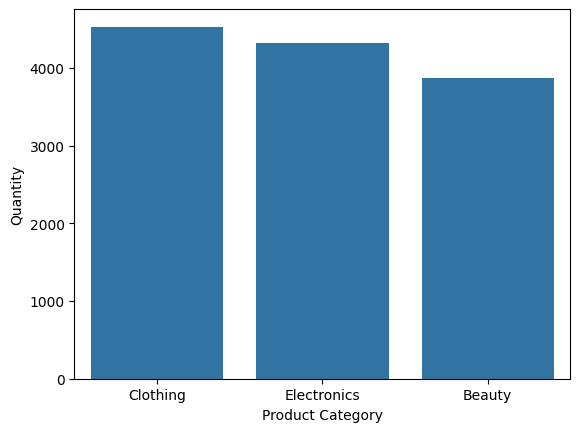

In [1246]:
sns.barplot( x = "Product Category", y = "Quantity", data = df3)

In [1247]:
df1.head(1)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1.0,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150.0,25-34


6. Investigate the relationship between quantity, price per unit, and total amount for different product categories.

In [1248]:
df1.groupby(["Product Category"]).agg({"Quantity":"sum","Price per Unit":"mean", "Total Amount":"sum"})

,Quantity,Price per Unit,Total Amount
Product Category,,,
Beauty,3875.0,180.681818,718175.0
Clothing,4530.0,174.435028,795850.0
Electronics,4325.0,179.884726,800675.0


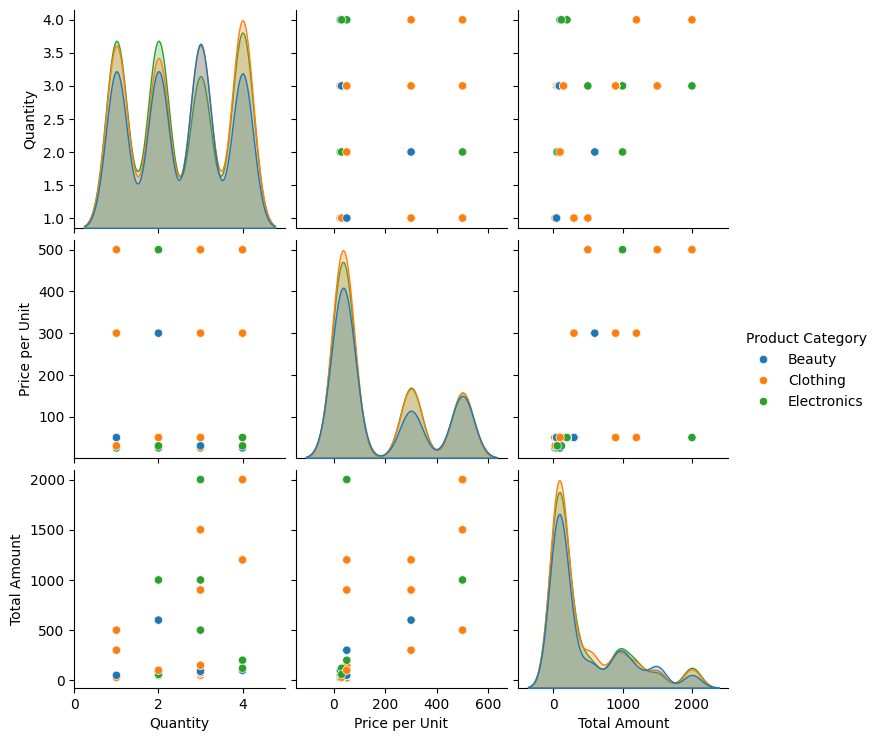

In [1249]:
sns.pairplot(df1, hue='Product Category', vars=['Quantity', 'Price per Unit', 'Total Amount'])
plt.show()

7. Analyze trends over time using the date column, such as monthly or yearly sales trends.

In [1250]:
df1.head(1)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1.0,2023-11-24,CUST001,Male,34.0,Beauty,3.0,50.0,150.0,25-34


In [1251]:
df1.set_index('Date', inplace=True)

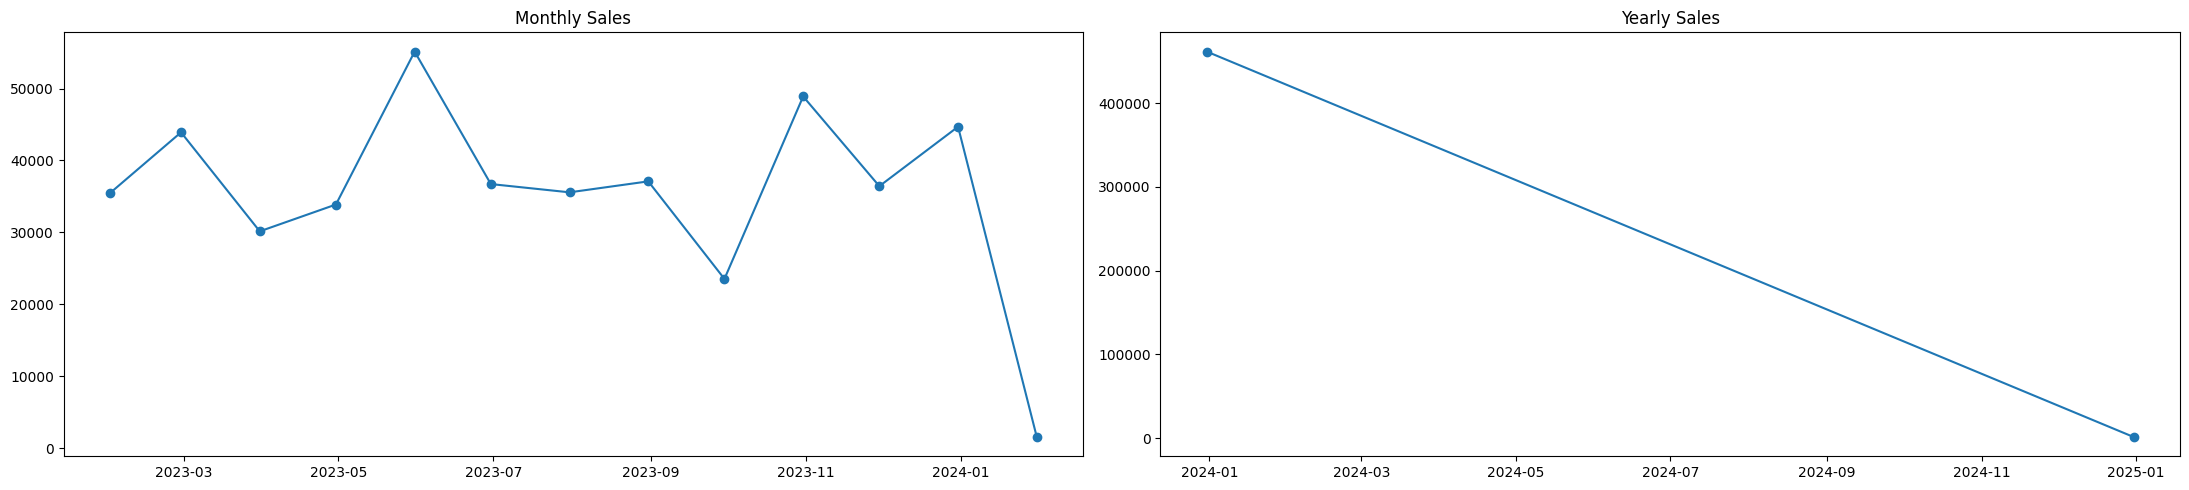

In [1252]:
plt.figure(figsize = (22,5))
plt.subplot(1,2,1)
plt.plot('Date','Total Amount',marker = 'o' ,data = monthly_sales)
plt.title('Monthly Sales')

plt.subplot(1,2,2)
plt.plot('Date','Total Amount',marker = 'o' ,data = yearly_sales)
plt.title('Yearly Sales')
plt.tight_layout()
plt.show()

##Machine Learning:

1. Predict the sales of the product according to the number they were sold.

In [1253]:
# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1254]:
# Predict Sales Based on Number of Products Sold (Regression):

X = df1[['Quantity']]
y = df1['Total Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 264431.0565580451


2. Predict product categories (Beauty/Clothing/Electronics) based on customer demographics and purchase history. (classification)

In [1255]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df1[['Age', 'Quantity', 'Price per Unit']]
y = df1['Product Category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Beauty       0.75      0.71      0.73       320
    Clothing       0.66      0.70      0.68       319
 Electronics       0.73      0.73      0.73       370

    accuracy                           0.71      1009
   macro avg       0.71      0.71      0.71      1009
weighted avg       0.72      0.71      0.71      1009



#3.	Predict total amount spent by customers by age using regression algorithms.

In [1256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df1[['Age']]
y = df1['Total Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 296507.2633467508


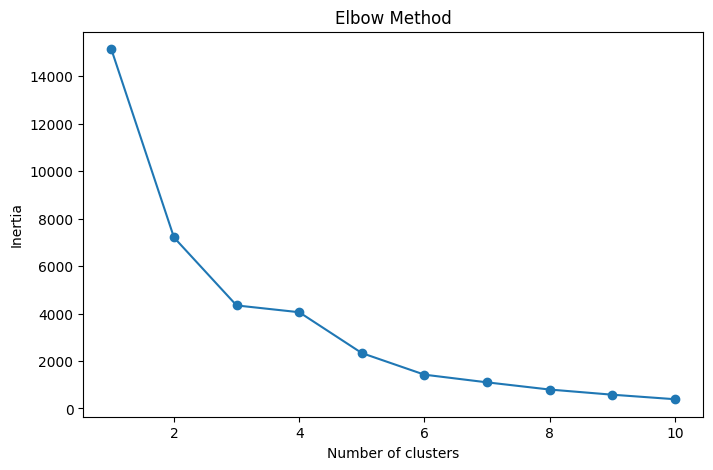

In [1257]:
plt.figure(figsize=(8, 5))
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df1[['Quantity', 'Price per Unit', 'Total Amount']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42) 
df1['Cluster'] = kmeans.fit_predict(X_scaled)

THANK YOU!

In [1258]:
#pip install psycopg2-binary
from sqlalchemy import create_engine

In [1259]:
DB_NAME = 'dilip_db'
DB_HOST = 'dlytica-academy-server-l2a-master.eastus.cloudapp.azure.com:30100'
DB_USER = 'dilip'
DB_PASS = 'dilip_123'

In [1260]:
conn_string = f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}'

db = create_engine(conn_string)

conn = db.connect()

In [1261]:
df1.to_sql('testdata_dilip',conn, if_exists = 'replace')

45

In [1262]:
df1.isnull().sum()

Transaction ID      0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Age Group           0
Cluster             0
dtype: int64